In [38]:
import pandas as pd

In [4]:
data=pd.read_csv('/content/bank-full.csv',sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#EDA

In [6]:
data.shape

(45211, 17)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
data.isna().sum() #NullValues

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
#Finding duplicate values
data[data.duplicated()]


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [16]:
# passing dummy variables over object data,taking  only k-1 values to avoid dummy variable trap
marital=pd.get_dummies(data['marital'],drop_first=True)
education=pd.get_dummies(data['education'],drop_first=True)
default=pd.get_dummies(data['default'],drop_first=True)
housing=pd.get_dummies(data['housing'],drop_first=True)
loan=pd.get_dummies(data['loan'],drop_first=True)
contact=pd.get_dummies(data['contact'],drop_first=True)
poutcome=pd.get_dummies(data['poutcome'],drop_first=True)
y=pd.get_dummies(data['y'],drop_first=True)

In [18]:
# concating all variables with dummies along columns.
data_cleaned=pd.concat([data,marital,education,default,housing,loan,contact,poutcome,y],axis=1)

In [20]:
bank_data_cleaned= data_cleaned.drop(['job','marital','education','default','housing','loan','month','contact','poutcome','y'],axis=1)


In [21]:
bank_data_cleaned

,age,balance,day,duration,campaign,pdays,previous,married,single,secondary,...,unknown,yes,yes,yes,telephone,unknown,other,success,unknown,yes
0,58,2143,5,261,1,-1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,44,29,5,151,1,-1,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
2,33,2,5,76,1,-1,0,1,0,1,...,0,0,1,1,0,1,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,0
4,33,1,5,198,1,-1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,1,0,1,...,0,0,0,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,1,0,1,...,0,0,0,0,1,0,0,0,1,0


In [22]:
bank_data_cleaned.shape

(45211, 21)

In [23]:
bank_data_cleaned.dtypes

age          int64
balance      int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
married      uint8
single       uint8
secondary    uint8
tertiary     uint8
unknown      uint8
yes          uint8
yes          uint8
yes          uint8
telephone    uint8
unknown      uint8
other        uint8
success      uint8
unknown      uint8
yes          uint8
dtype: object

#model building and model training


In [24]:
x=bank_data_cleaned.iloc[:,:20]
y=bank_data_cleaned.iloc[:,20]

In [25]:
x

,age,balance,day,duration,campaign,pdays,previous,married,single,secondary,tertiary,unknown,yes,yes,yes,telephone,unknown,other,success,unknown
0,58,2143,5,261,1,-1,0,1,0,0,1,0,0,1,0,0,1,0,0,1
1,44,29,5,151,1,-1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
2,33,2,5,76,1,-1,0,1,0,1,0,0,0,1,1,0,1,0,0,1
3,47,1506,5,92,1,-1,0,1,0,0,0,1,0,1,0,0,1,0,0,1
4,33,1,5,198,1,-1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,1,0,1,0,0,0,0,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,1,0,1,0,0,0,0,0,1,0,0,0,1


In [39]:
y.value_counts()

0    39922
1     5289
Name: yes, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [37]:
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression(solver = 'liblinear')
model_1.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [29]:
# predict y by passing x_test data using model_1
y_pred=model_1.predict(x_test)

#Model evaluation

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

In [31]:
confusion_matrix

array([[7776,  194],
       [ 743,  330]])

In [32]:
y_test.value_counts()

0    7970
1    1073
Name: yes, dtype: int64

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7970
           1       0.63      0.31      0.41      1073

    accuracy                           0.90      9043
   macro avg       0.77      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [41]:
model_1.predict_proba(x)

array([[0.97895812, 0.02104188],
       [0.98425426, 0.01574574],
       [0.99489749, 0.00510251],
       ...,
       [0.02766985, 0.97233015],
       [0.81247902, 0.18752098],
       [0.74094075, 0.25905925]])

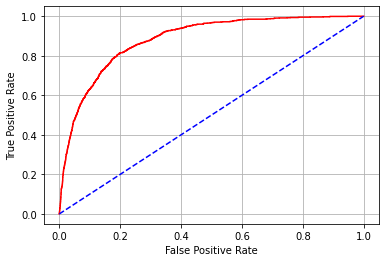

In [35]:
#ROC Curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test ,y_pred)

fpr , tpr , thresh = roc_curve(y_test , model_1.predict_proba(x_test) [: , 1]) # selecting Thresh based on positives ie > ' '.
plt.plot(fpr, tpr , color = 'red')
plt.plot([0,1],[0,1] , 'b--') # creating center line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.show()